In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4
from pprint import pprint as pp
import numpy as np
from scipy.interpolate import griddata
import glob
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
"""
Find all the files in the 2016_01 directory and print out the ones that contain the string '20160101'
To filter the files for January 1st
"""
all_files = glob.glob('./2016_01/*.nc')

jan1_files = [f for f in all_files if '20160101' in f]

for filename in jan1_files:
    print(filename)

./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041321_20160101200000_20160101205959____.nc
./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041320_20160101140000_20160101145959____.nc
./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041322_20160101210000_20160101215959____.nc
./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041319_20160101180000_20160101185959____.nc
./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041321_20160101190000_20160101195959____.nc
./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041327_20160101220000_20160101225959____.nc
./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041310_20160101090000_20160101095959____.nc
./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041234_20160101060000_20160101065959____.nc
./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB

In [3]:
sample_datasets = [
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041321_20160101200000_20160101205959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041320_20160101140000_20160101145959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041322_20160101210000_20160101215959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041319_20160101180000_20160101185959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041321_20160101190000_20160101195959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041327_20160101220000_20160101225959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041310_20160101090000_20160101095959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041234_20160101060000_20160101065959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041159_20160101020000_20160101025959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041346_20160101230000_20160101235959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041151_20160101010000_20160101015959____.nc',
'./2016_01/W_IT-HSAF-ROME,SAT,SSM-ASCAT-METOPB-6.25km-H129_C_LIIB_20231226041320_20160101160000_20160101165959____.nc',
]

In [10]:
"""
Pick a dataset to print out some statistics, shape of data etc.
Add more if you would like
"""
stats_dataset_path = sample_datasets[0]
stats_dataset = netCDF4.Dataset(stats_dataset_path)

print(stats_dataset.variables.keys())
print(stats_dataset.variables['latitude'])
print(stats_dataset.variables['longitude'])



dict_keys(['location_id', 'latitude', 'longitude', 'time', 'as_des_pass', 'swath_indicator', 'surface_soil_moisture', 'surface_soil_moisture_noise', 'backscatter40', 'slope40', 'curvature40', 'surface_soil_moisture_sensitivity', 'backscatter_flag', 'correction_flag', 'processing_flag', 'surface_flag', 'snow_cover_probability', 'frozen_soil_probability', 'wetland_fraction', 'topographic_complexity', 'subsurface_scattering_probability'])
<class 'netCDF4._netCDF4.Variable'>
int32 latitude(obs)
    _FillValue: -2147483648
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    add_offset: 0.0
    scale_factor: 1e-06
    valid_min: -90000000
    valid_max: 89999999
    missing_value: -2147483648
unlimited dimensions: 
current shape = (259067,)
filling on
<class 'netCDF4._netCDF4.Variable'>
int32 longitude(obs)
    _FillValue: -2147483648
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    add_offset: 0.0
    scal

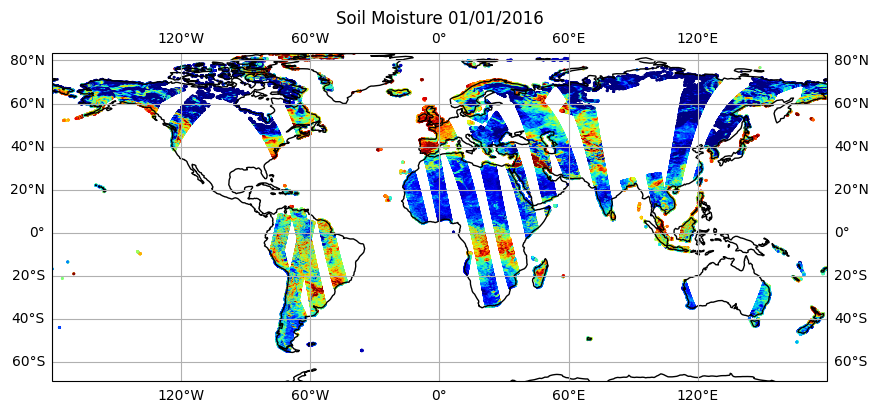

In [5]:
"""
Since this is satellite orbit data we need to perform some magic
to get the data into a format that we can use to plot on a map.
We use the scipy.interpolate.griddata function to interpolate
the data onto a regular grid.

Then use scatter method to plot the data on a map.
"""
min_lat, max_lat, min_lon, max_lon = float('inf'), float('-inf'), float('inf'), float('-inf')

for dataset in sample_datasets:
    plot = netCDF4.Dataset(dataset)
    min_lat = min(min_lat, plot.variables['latitude'][:].min())
    max_lat = max(max_lat, plot.variables['latitude'][:].max())
    min_lon = min(min_lon, plot.variables['longitude'][:].min())
    max_lon = max(max_lon, plot.variables['longitude'][:].max())

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax.title.set_text('Soil Moisture 01/01/2016')

for dataset in sample_datasets:
    plot = netCDF4.Dataset(dataset)
    sc = ax.scatter(plot.variables['longitude'][:], plot.variables['latitude'][:], c=plot.variables['surface_soil_moisture'][:], cmap='jet', s=1)

plt.show()